In [220]:
# x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
# print('x_min:',x_min)#x_min: -1.854620411771002
# print('x_max:',x_max)#x_max: 2.755363020128324
# y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
# print('y_min:',y_min)#y_min: -1.4320638231557181
# print('y_max',y_max)#y_max: 1.8416104458154692
# h=0.01
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# print(xx)
# print('-'*100)
# print(yy)
# print(yy.ravel())
# print(xx.shape)#(328, 461)
# print(yy.shape)#(328, 461)
# print(len(xx.ravel()))#151208
# print(len(yy.ravel()))#151208
# Z=clf.predict(np.c_[xx.ravel(), yy.ravel()])
# print(Z)
# print(Z.shape)

In [221]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib
from tqdm import tqdm

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

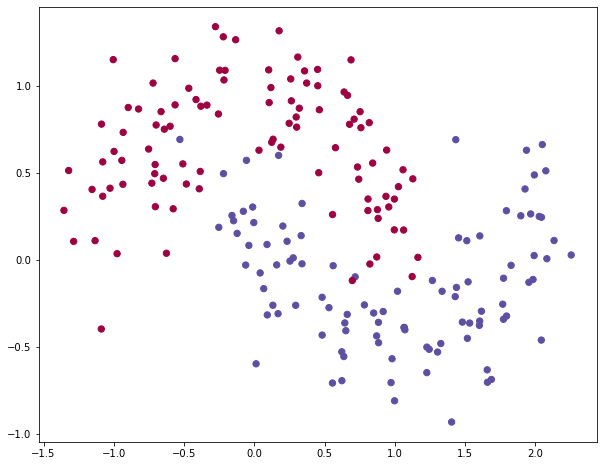

In [222]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [223]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)

LogisticRegressionCV()

In [224]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

Text(0.5, 1.0, 'Logistic Regression')

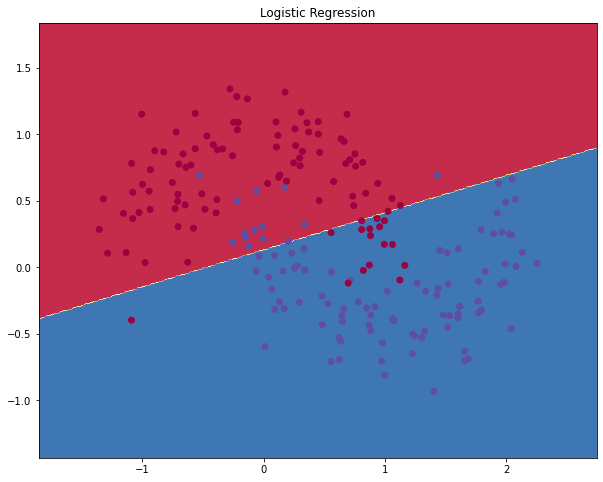

In [225]:
# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")

# one hot vector

In [226]:
def one_hot_vector(input_vector,num_class):
    vector_one_hot=np.zeros((num_class,len(input_vector)))
    for i in range(len(input_vector)):
        vector_one_hot[input_vector[i],i]=1
    return vector_one_hot

# soft max

In [227]:
def softmax(input_vector):
    exp_softmax=np.exp(input_vector)
    output_vector=exp_softmax/np.sum(exp_softmax,axis=0,keepdims=True)
    
    return output_vector

# caculate loss

In [228]:
def loss(yhat,ylabel):
    L=-np.sum(ylabel*np.log(yhat))
    
    return L/yhat.shape[1]

# predict

In [229]:
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

# build model

In [236]:
n_input=2
n_output=2
n_hidden=3
num_epoch=10
num_class=2

A0=X.T
Y=one_hot_vector(y,num_class)
m=200
lr=0.01


def build_model(epoch=num_epoch,n_input=n_input,n_output=n_output,n_hidden=n_hidden):
    
    #initalizations weight

    np.random.seed(0)
    W1=np.random.randn(3,2)*0.01
    b1=np.zeros((3,1))
    W2=np.random.randn(2,3)*0.01
    b2=np.zeros((2,1))
    
    for i in range(epoch):
                
        #forward propagation

        Z1=np.dot(W1,A0)+b1
        A1=np.tanh(Z1)
        Z2=np.dot(W2,A1)+b2
        A2=softmax(Z2)
        #print(A2.shape)
        assert(A2.shape==(2,200))

        #backpropagations
        #tanh(x)'=1-tanh(x)^2
        dZ2=A2-Y
        dW2=1/m*np.dot(dZ2,A1.T)
        db2=1/m*np.sum(dZ2,axis=1,keepdims=True)
        dA1=np.dot(W2.T,dZ2)
        dZ1=dA1*(1-np.power(A1,2))
        dW1=1/m*np.dot(dZ1,A0.T)
        db1=1/m*np.sum(dZ1,axis=1,keepdims=True)

        #update weight
        W2-=lr*dW2
        b2-=lr*db2
        W1-=lr*dW1
        b1-=lr*db1
        
        #save model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

        if i%1000 == 0:
            print('loss_{}:'.format(i),loss(A2,Y))
    
    return model


In [237]:
model=build_model(epoch=20000,n_hidden=3)

loss_0: 0.693069686284245
loss_1000: 0.5124809687775482
loss_2000: 0.3330609127095589
loss_3000: 0.3108300753686592
loss_4000: 0.30726798626784
loss_5000: 0.3063012031579695
loss_6000: 0.3057617466380337
loss_7000: 0.3053349769994411
loss_8000: 0.30496766736836
loss_9000: 0.3046453746363721
loss_10000: 0.3043603065241001
loss_11000: 0.30410663011964834
loss_12000: 0.3038796487702458
loss_13000: 0.3036755161278146
loss_14000: 0.3034910506809106
loss_15000: 0.30332359601641984
loss_16000: 0.30317091456006556
loss_17000: 0.3030311066540996
loss_18000: 0.3029025483928793
loss_19000: 0.30278384324981694
